In [1]:
import sys
import os

# Dynamically add the src/ folder to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
src_path = os.path.join(project_root, "src")
sys.path.append(src_path)

Attributes: [ 0.  0.  0.  0.  7.  6.  0.  0.  0.  0.  0.  6. 15.  6.  0.  0.  0.  0.
  1. 15.  5. 14.  3.  0.  0.  0. 12.  8.  4. 16.  0.  0.  0.  5. 16.  9.
 10. 16.  4.  0.  0.  1. 11. 12. 14. 14.  4.  0.  0.  0.  0.  0.  8.  8.
  0.  0.  0.  0.  0.  0. 11.  7.  0.  0.]
Class: 4


/home/tom/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


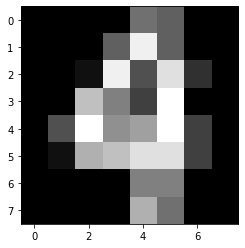

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# Load digits dataset
digits = datasets.load_digits(return_X_y=True)
digits_dataset_X = digits[0]
digits_dataset_y = digits[1]
N = len(digits_dataset_X)

# Print the 64 attributes of a random digit, its class, and show the digit
digit_to_show = np.random.choice(range(N), 1)[0]
print("Attributes:", digits_dataset_X[digit_to_show])
print("Class:", digits_dataset_y[digit_to_show])

plt.imshow(np.reshape(digits_dataset_X[digit_to_show], (8, 8)), cmap='gray')
plt.show()


In [3]:
from utils.utils import *

# Build stratified folds
NUM_FOLDS = 10
X_train, X_test, y_train, y_test = shuffle_and_split(digits_dataset_X, digits_dataset_y)
X_train_folds, y_train_folds = stratified_folds(X_train, y_train, NUM_FOLDS)

In [10]:
from models.knn.knn import KNN
from utils.utils import *

k_values = [1, 3, 5, 10, 20, 50]
k_accuracies = {}
k_f1s = {}
for k in k_values:
    accuracies = []
    f1s = []
    for f, fold in enumerate(X_train_folds):
        knn = KNN()
        
        x_train = np.concatenate([X_train_folds[j] for j in range(len(X_train_folds)) if j != f])
        y_train = np.concatenate([y_train_folds[j] for j in range(len(y_train_folds)) if j != f])
        x_val = X_train_folds[f]
        y_val = y_train_folds[f]
        
        knn.train(x_train, y_train)
        y_val_predict = knn.predict(x_val, k=k)
        tp, fp, tn, fn = confusion_matrix(y_val_predict, y_val)
        val_acc = calc_accuracy(tp, tn, y_val_predict.shape[0])
        precision = calc_precision(tp, fp)
        recall = calc_recall(tp, fn)
        f1 = calc_f1_score(precision, recall)
        accuracies.append(val_acc)
        f1s.append(f1)
        print("K", k, "fold", f+1, "Accuracy", f"{val_acc:.2f}", "F1", f"{f1:.2f}")
    k_accuracies[k] = np.mean(accuracies)
    k_f1s[k] = np.mean(f1s)
        
print("Accuracies", k_accuracies)
print("F1s", f1s)
#         print("K", k, "fold", f+1, "Accuracy", f"{val_acc:.2f}", "F1", f"{f1:.2f}")
    

K 1 fold 1 Accuracy 0.98 F1 0.91
K 1 fold 2 Accuracy 0.99 F1 0.94
K 1 fold 3 Accuracy 1.00 F1 1.00
K 1 fold 4 Accuracy 0.99 F1 0.97
K 1 fold 5 Accuracy 0.99 F1 0.97
K 1 fold 6 Accuracy 0.99 F1 0.97
K 1 fold 7 Accuracy 1.00 F1 1.00
K 1 fold 8 Accuracy 0.97 F1 0.88
K 1 fold 9 Accuracy 0.99 F1 0.97
K 1 fold 10 Accuracy 0.99 F1 0.97
K 3 fold 1 Accuracy 0.99 F1 0.94
K 3 fold 2 Accuracy 0.99 F1 0.94
K 3 fold 3 Accuracy 1.00 F1 1.00
K 3 fold 4 Accuracy 0.99 F1 0.97
K 3 fold 5 Accuracy 0.99 F1 0.97
K 3 fold 6 Accuracy 0.99 F1 0.97
K 3 fold 7 Accuracy 0.99 F1 0.93
K 3 fold 8 Accuracy 0.97 F1 0.86
K 3 fold 9 Accuracy 0.99 F1 0.97
K 3 fold 10 Accuracy 0.99 F1 0.97
K 5 fold 1 Accuracy 0.99 F1 0.94
K 5 fold 2 Accuracy 0.99 F1 0.94
K 5 fold 3 Accuracy 0.99 F1 0.94
K 5 fold 4 Accuracy 0.99 F1 0.97
K 5 fold 5 Accuracy 0.99 F1 0.97
K 5 fold 6 Accuracy 0.99 F1 0.94
K 5 fold 7 Accuracy 0.99 F1 0.93
K 5 fold 8 Accuracy 0.97 F1 0.86
K 5 fold 9 Accuracy 0.99 F1 0.97
K 5 fold 10 Accuracy 0.99 F1 0.97
K 10 fo